<a href="https://colab.research.google.com/github/Amitha-sridhar/ML_capstone-project_yes-bank_stock-closing-prediction/blob/main/ML_Stock_Prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**
**Problem Statement - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **1.Importing Libraries and dataset**




In [215]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [216]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [217]:
df=pd.read_csv('/content/drive/MyDrive/ML_Capstone/YesBank_StockPrices.csv')  #reading the csv file

In [218]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# 2.**Data Study**

In [219]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [220]:
df.shape

(185, 5)

In [221]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


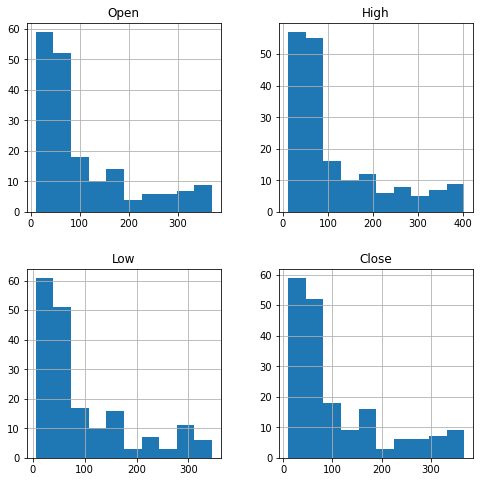

In [223]:
df.hist(figsize=(8,8))# to see the distribution of values
plt.show()

# **3.Data Manipulation**

## **3.1 Finding Null Values**




In [224]:
#To get the percentage of null values each column wise
nullvalues_percentage = df.isna().sum().sort_values(ascending= False)/len(df) 
nullvalues_percentage

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

In [225]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


## **3.2 Handling outliers**

In [226]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [227]:
num_cols = df._get_numeric_data().columns
num_cols

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

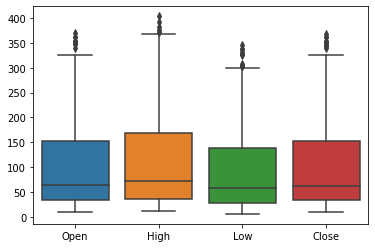

In [228]:
sns.boxplot(data=df)

In [229]:
new_df=df.copy()

In [230]:
for col in ['Open','High','Low','Close']:#redefining the data and setting the outliers value with the range
  
  Q1 = new_df.quantile(0.25)
Q3 = new_df.quantile(0.75)

# calculate the IQR
IQR = Q3 - Q1

# filter the dataset with the IQR
IQR_outliers = new_df[((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers
new_df = new_df[~((new_df < (Q1 - 1.5 * IQR)) |(new_df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [231]:
new_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


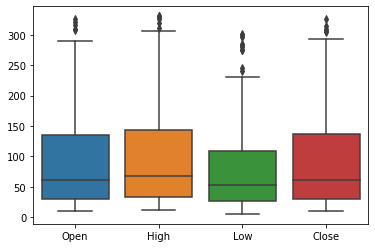

In [232]:
sns.boxplot(data=new_df)

In [233]:
new_df.describe()

,Open,High,Low,Close
count,173.000000,173.000000,173.000000,173.000000
mean,89.141734,98.362312,80.276012,89.399480
std,79.057550,84.845315,73.610336,79.783312
min,10.000000,11.240000,5.550000,9.980000
25%,30.660000,34.160000,26.200000,30.310000
50%,61.540000,68.360000,53.150000,61.210000
75%,135.610000,143.910000,109.200000,136.830000
max,326.000000,330.580000,300.650000,326.140000


# **4.EDA AND DATA VISUALIZATION**

## **4.1 Year-Wise Study Open and Close**

In [234]:
new_df['Date'] = new_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [235]:
new_df.set_index('Date',inplace=True)

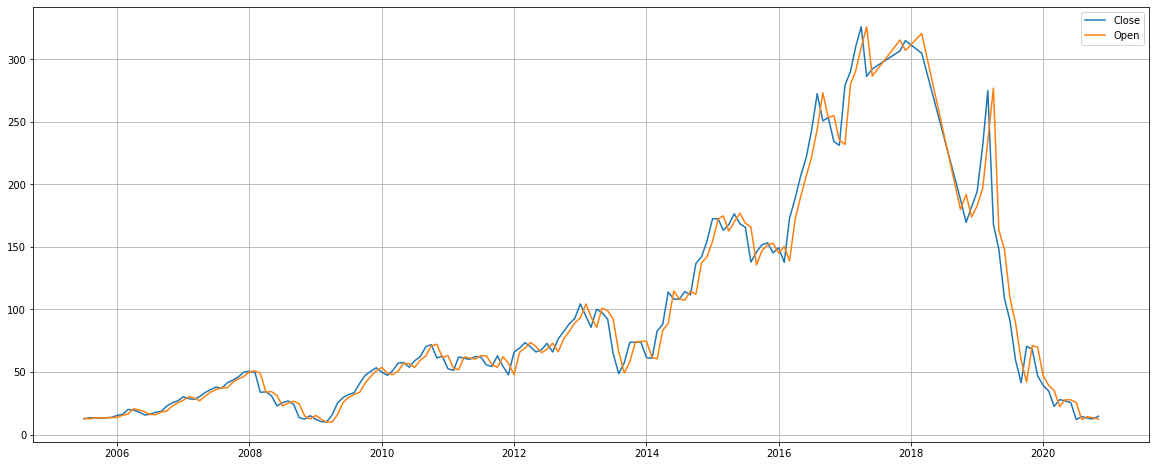

In [236]:
plt.figure(figsize=(20,8))
plt.plot(new_df['Close'])
plt.plot(new_df['Open'])
plt.legend(['Close','Open'])
plt.grid()

## **4.2 Year-Wise Study High and Low**

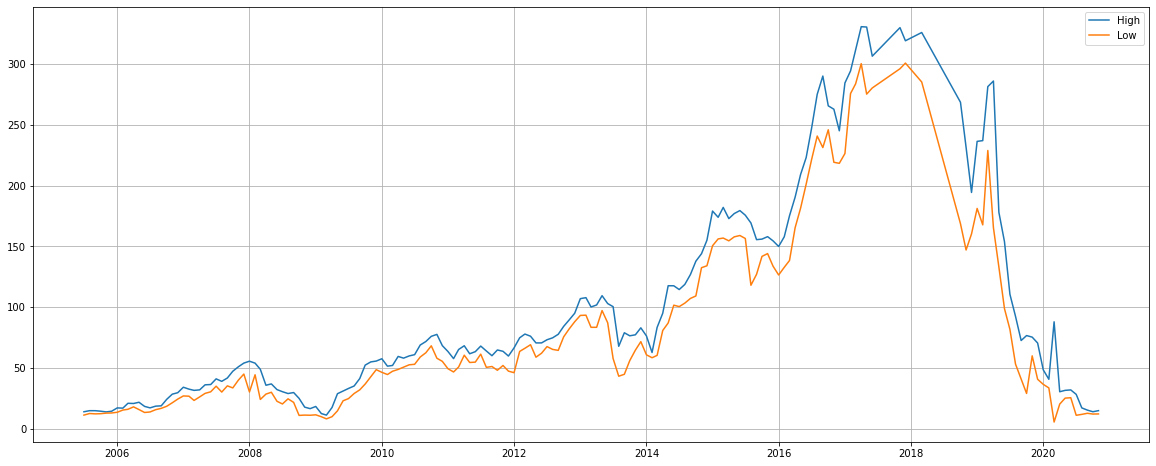

In [237]:
plt.figure(figsize=(20,8))
plt.plot(new_df['High'])
plt.plot(new_df['Low'])
plt.legend(['High','Low'])
plt.grid()

## **4.3 Data Distribution and mean and median of every variables independently**

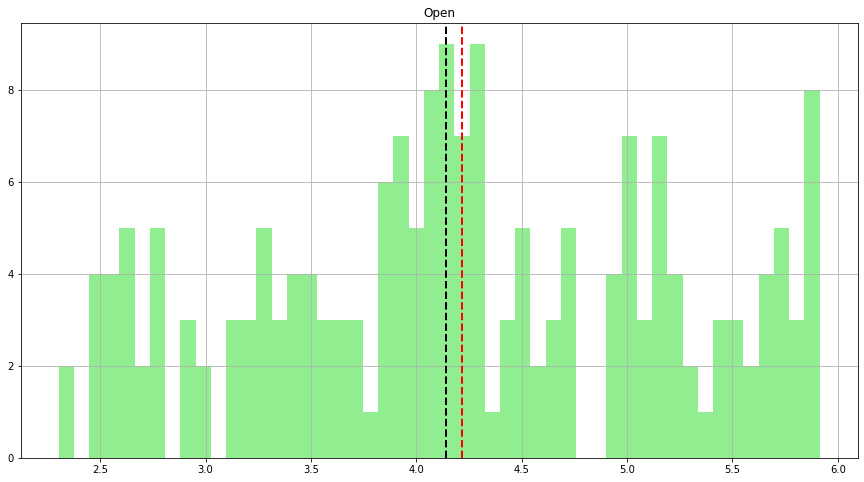

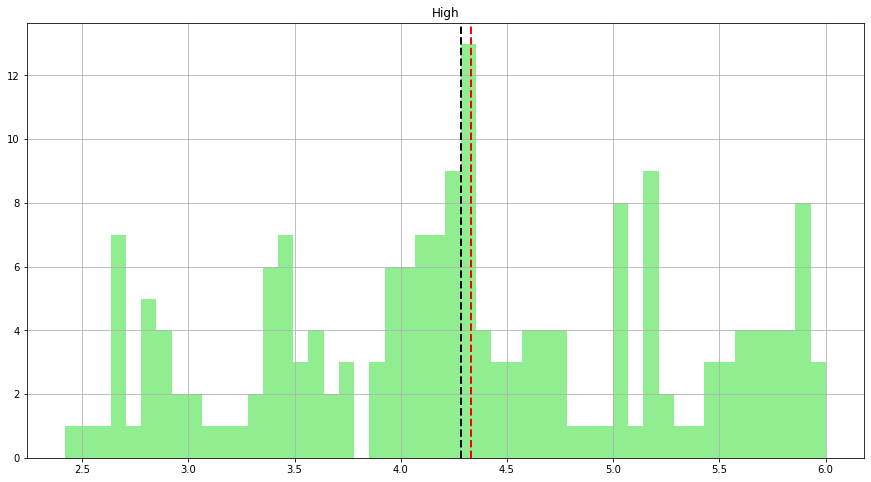

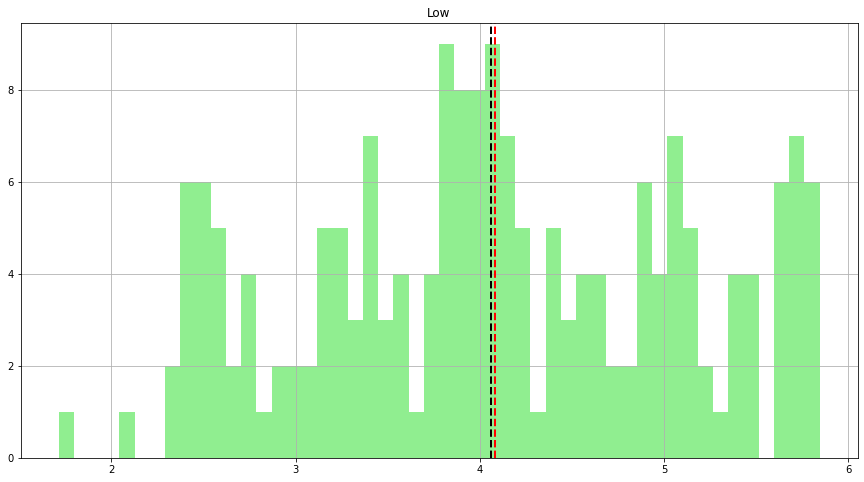

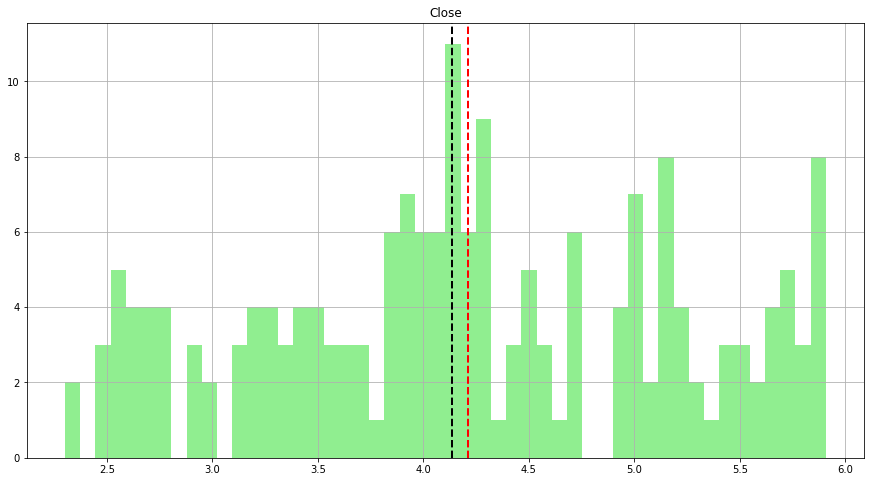

In [261]:
for col in num_cols[:]:
   # Defining the size of the graph
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    # Normalizing the values using logarithamic function
    feature = np.log(df[col])
    # Defining the number of bins and colur of the graph
    feature.hist(bins=50, ax = ax,color="lightgreen")
    # Definig the mean properties
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    # Defining the median properties
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)  
    # Defining the title of the graph  
    ax.set_title(col)
# Displaying the graph    
plt.show()

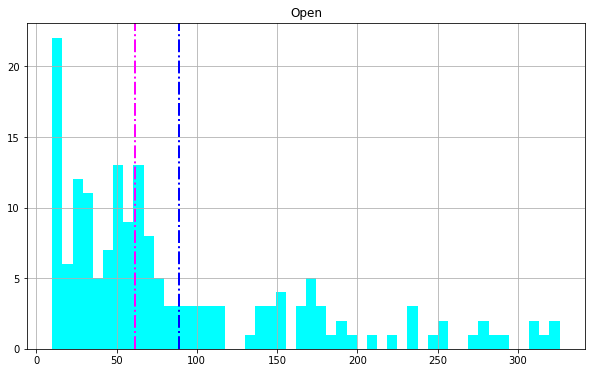

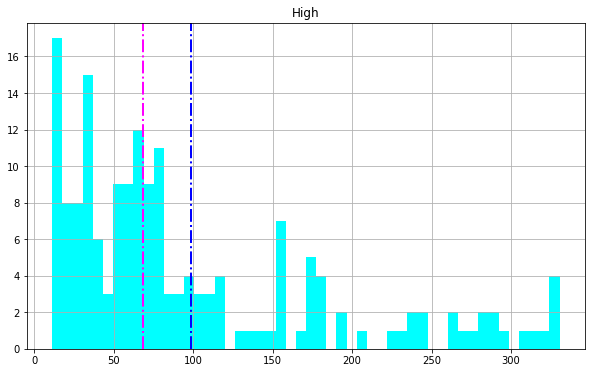

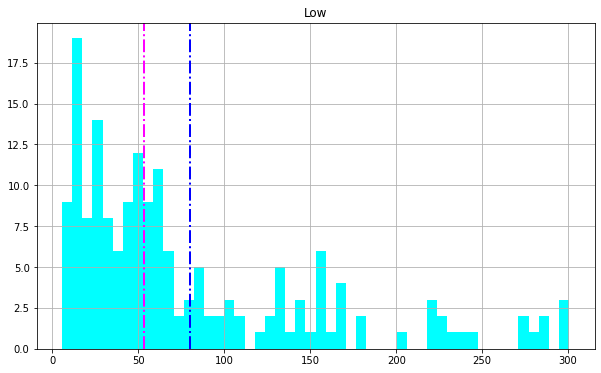

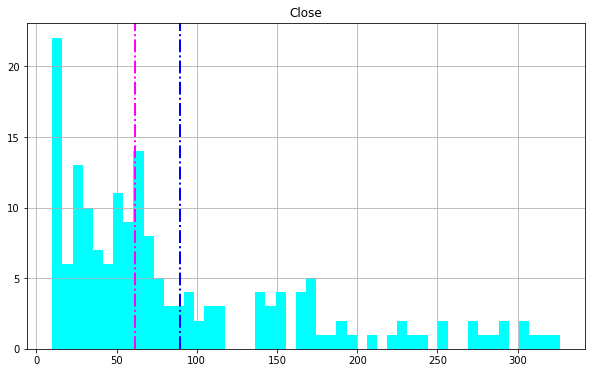

In [238]:
#for i in num_cols[:]:
  #fig = plt.figure(figsize=(10,6))
  #ax = fig.gca()
  #features = new_df[i]
  #label = new_df['Close']
  #features.hist(bins = 50,ax = ax,color = 'cyan')
  #ax.axvline(features.mean(),color = 'blue',linestyle = 'dashdot',linewidth = 2)
  #ax.axvline(features.median(),color = 'magenta',linestyle = 'dashdot',linewidth = 2)
  #ax.set_title(i)

In [273]:
indep_var=new_df[['High','Low','Open']]
dep_var=new_df['Close']

## **4.4 Independent Variable Study**

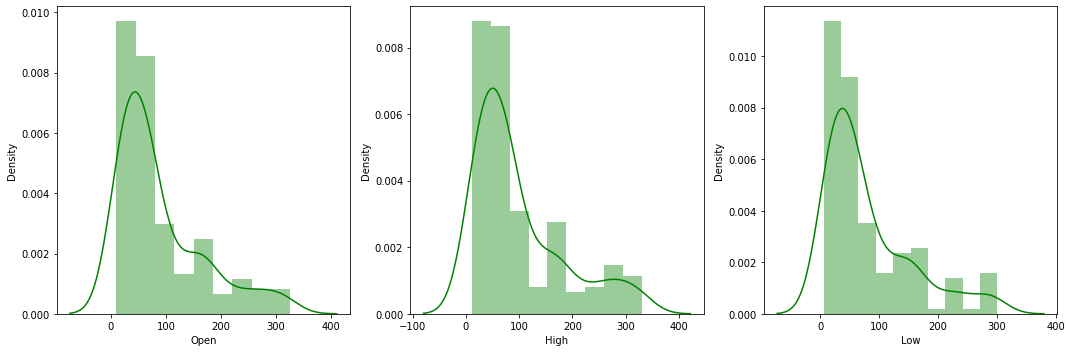

In [240]:
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(new_df['Open'], color='g', ax=axs[0])
sns.distplot(new_df['High'], color='g', ax=axs[1])
sns.distplot(new_df['Low'], color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

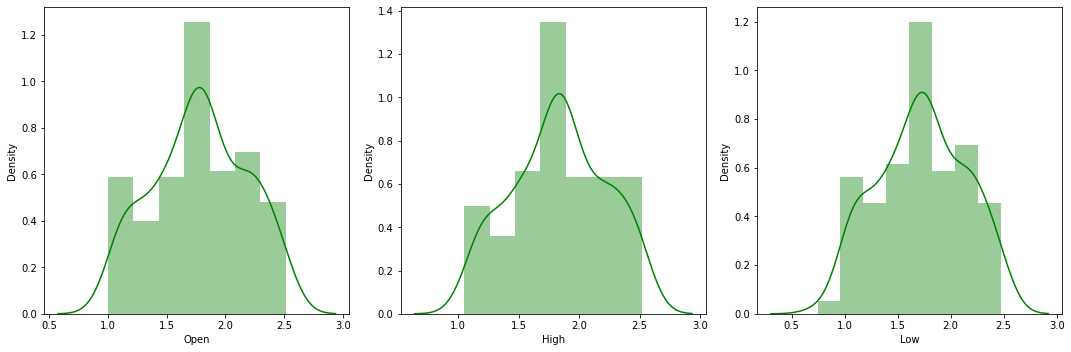

In [241]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(15,5))

#graph plot
sns.distplot(np.log10(new_df['Open']), color='g', ax=axs[0])
sns.distplot(np.log10(new_df['High']), color='g', ax=axs[1])
sns.distplot(np.log10(new_df['Low']), color='g',ax=axs[2])

# this prevents plots from overlapping
plt.tight_layout()

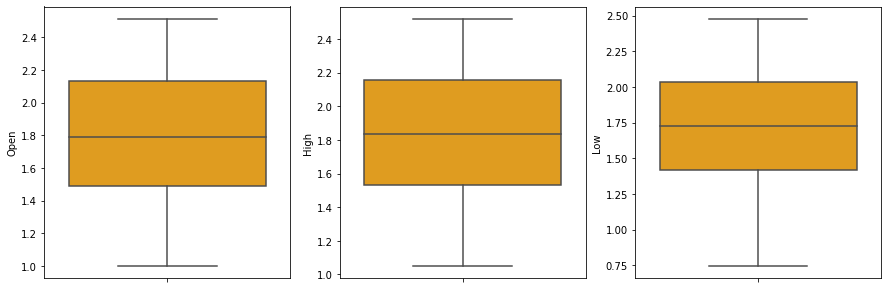

In [242]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig = sns.boxplot(y=np.log10(new_df["Open"]), color="orange",ax=axes[0])
fig = sns.boxplot(y=np.log10(new_df["High"]), color="orange",ax=axes[1])
fig = sns.boxplot(y=np.log10(new_df["Low"]), color="orange",ax=axes[2])

## **4.5 Dependent Variables Study and Normalization**

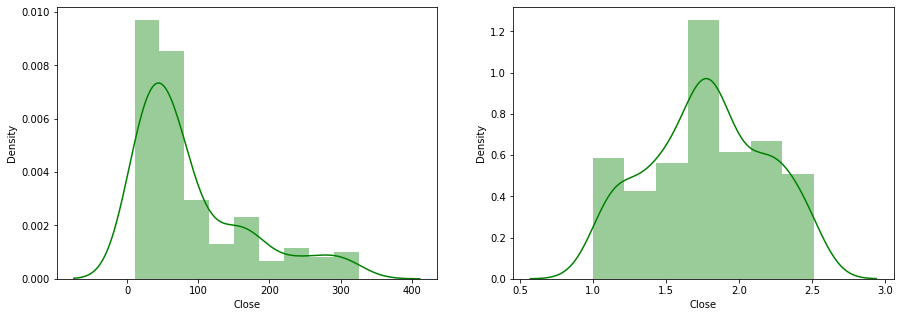

In [243]:
fig, axs = plt.subplots(ncols=2,figsize=(15,5))
sns.distplot(new_df['Close'], color='g', ax=axs[0])
sns.distplot(np.log10(new_df['Close']), color='g', ax=axs[1])


## **4.6 Heatmap**

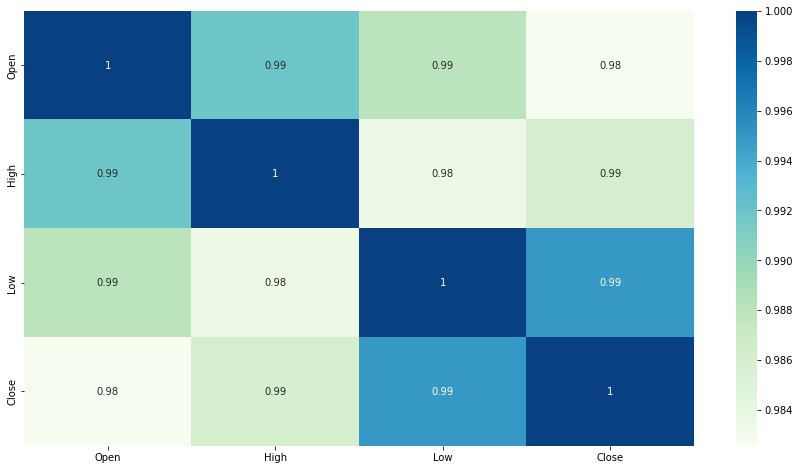

In [244]:
corr = new_df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'GnBu')

## **4.7 Co-relation between Independent and Dependent variables**

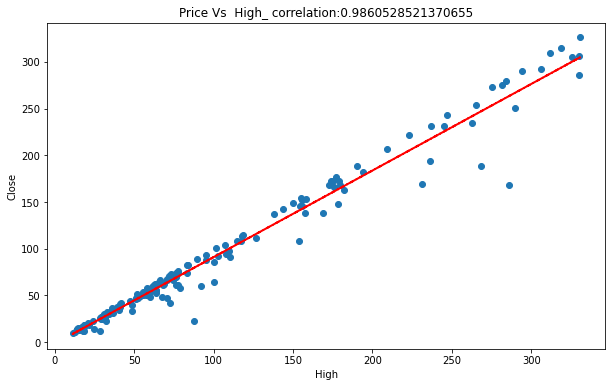

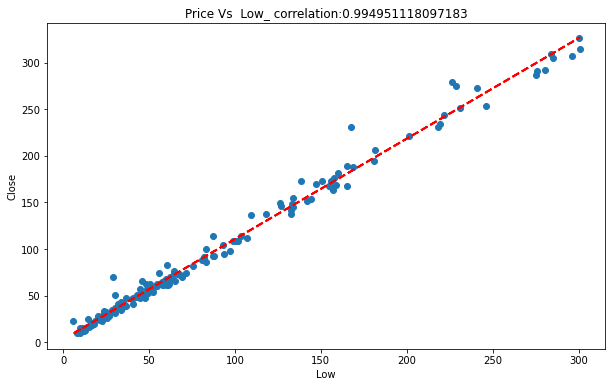

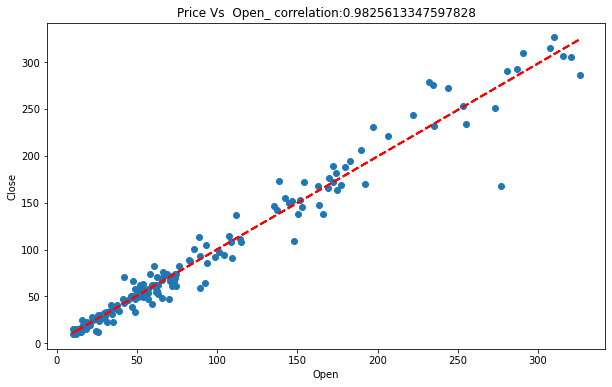

In [245]:
for col in indep_var[:-1]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  features = new_df[col]
  label = new_df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(new_df[col],new_df['Close'],1)
  y_hat = np.poly1d(z)(new_df[col])
  plt.plot(new_df[col] , y_hat, "r--",lw = 2)
plt.show()

# 5.**Multicollinearity using VIF analysis**

In [246]:
# Dealing with multicollinearity using VIF analysis.
# Calculating VIF(Variation Inflation Factor) to see the correlation between independent variables

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [247]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['Date','Close']]])

,variables,VIF
0,Open,200.317119
1,High,143.012400
2,Low,93.369555


# **6.Train/Test Model**

In [274]:
x_train, x_test, y_train, y_test =train_test_split(indep_var,dep_var, test_size=0.20, random_state=1)


In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [276]:
x_train[0:10]

array([[ 0.08532066,  0.14981357,  0.02832898],
       [-0.05316872,  0.08179661, -0.02044249],
       [ 0.67216942,  0.66800057,  0.72576097],
       [ 0.89271376,  0.99642157,  0.96474116],
       [-0.76685066, -0.74620174, -0.74591808],
       [-0.48502477, -0.46325644, -0.45450855],
       [-0.45825016, -0.38226515, -0.41671067],
       [ 0.8447041 ,  0.95356695,  0.87695252],
       [-0.86102344, -0.92731819, -0.8081017 ],
       [-0.54872988, -0.4517237 , -0.52522718]])

# **7. Model training**

In [267]:
from matplotlib.legend import Legend

def train_model(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  pred_value=model.predict(x_test)
  MSE=mean_squared_error(y_test,pred_value)
  RMSE=np.sqrt(MSE)
  r2=r2_score(y_test,pred_value)
  adj_r2=1-(1-r2_score(y_test,pred_value))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
  print(f'Evaluation matrix-- \n MSE: {MSE}\n RMSE: {RMSE}\n r2Score: {r2}\n adj_r2: {adj_r2}\n')
  print('Evaluation Graph')
  plt.figure(figsize=(20,8))
  p1=plt.plot(pred_value[:100])
  p2=plt.plot(np.array(y_test[:100]))
  plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
  plt.show()

## 7.1 Linear Regression

Evaluation matrix-- 
 MSE: 19.988578593594674
 RMSE: 4.470858820584103
 r2Score: 0.9978412541225983
 adj_r2: 0.9976450044973799

Evaluation Graph


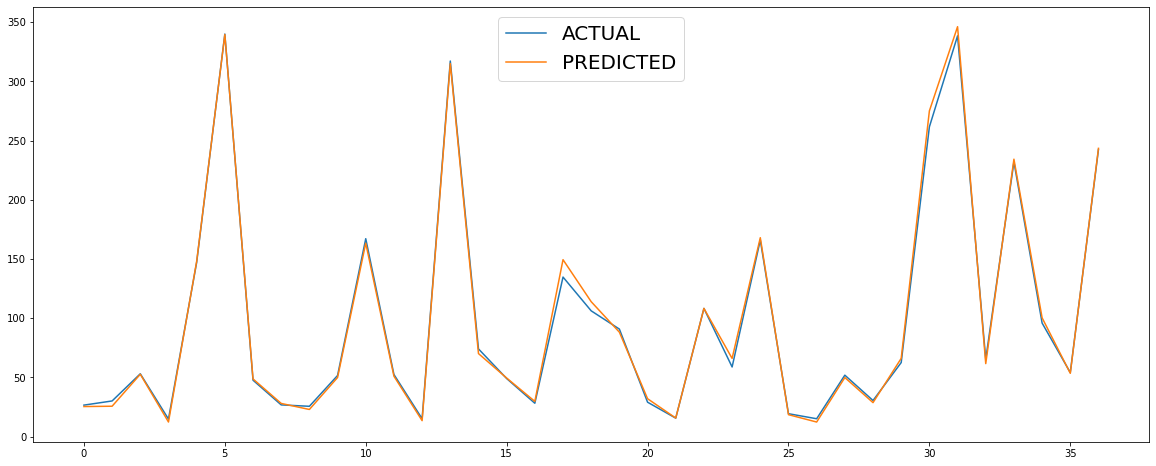

In [268]:
reg = LinearRegression()
train_model(reg,x_train,y_train,x_test,y_test)

## 7.2 Ridge Regression

Evaluation matrix-- 
 MSE: 29.76545806121095
 RMSE: 5.455772911440775
 r2Score: 0.9967853612212725
 adj_r2: 0.9964931213322973

Evaluation Graph


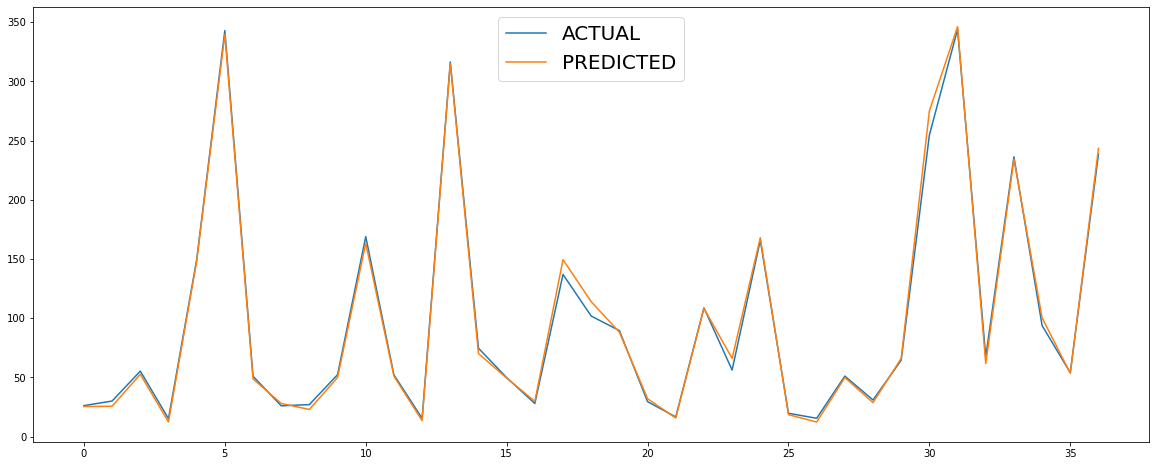

In [269]:
reg = Ridge()
train_model(reg,x_train,y_train,x_test,y_test)

## 7.3 Lasso Regression

Evaluation matrix-- 
 MSE: 44.58056990013331
 RMSE: 6.676868270389443
 r2Score: 0.9951853444188887
 adj_r2: 0.9947476484569695

Evaluation Graph


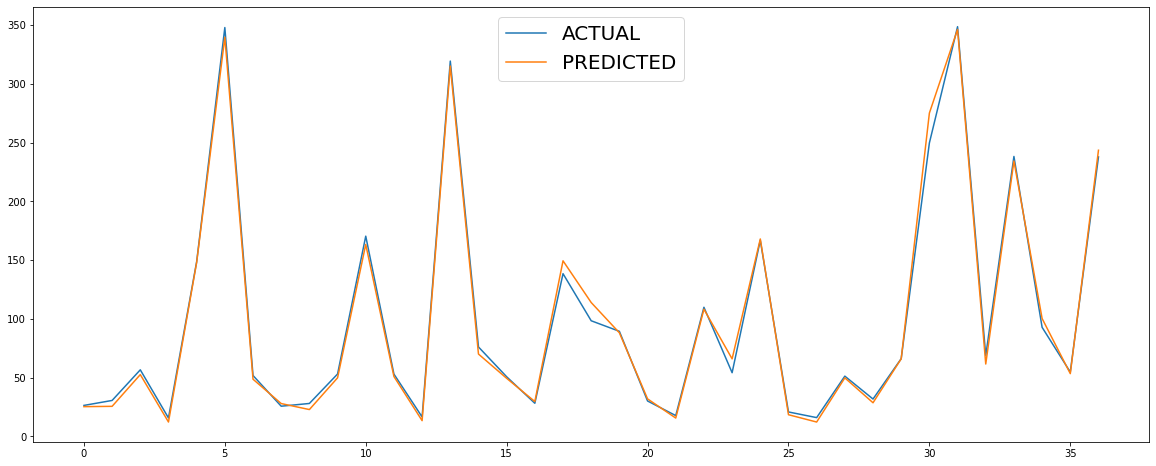

In [270]:
reg=Lasso()
train_model(reg,x_train,y_train,x_test,y_test)

## 7.4 Elastic Net regression

Evaluation matrix-- 
 MSE: 307.66336246462424
 RMSE: 17.540335300803807
 r2Score: 0.9667726740929501
 adj_r2: 0.9637520081014002

Evaluation Graph


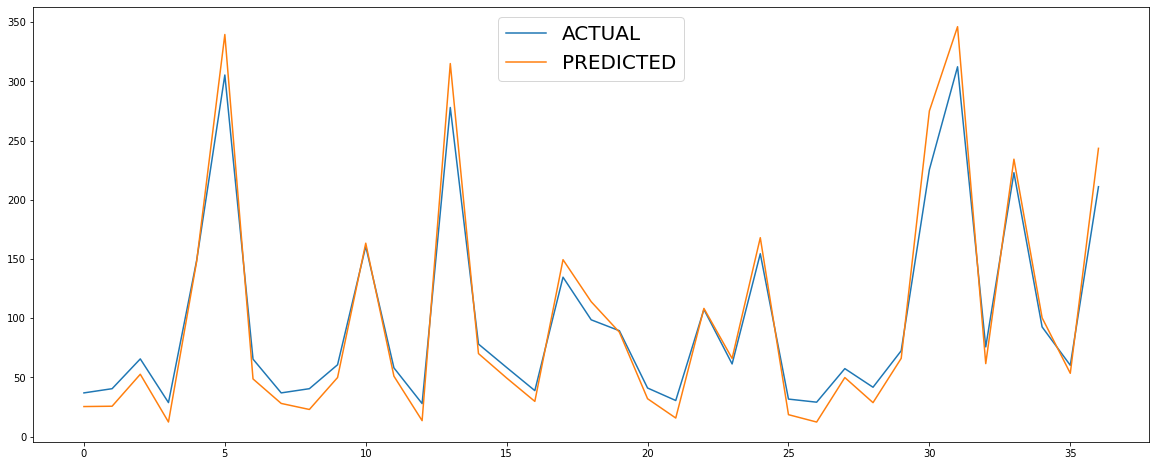

In [271]:
reg=ElasticNet()
train_model(reg,x_train,y_train,x_test,y_test)

XGBOOST

In [272]:
regularize the graphs

SyntaxError: ignored